## En esta entrega, haremos limpieza de datos importantes que hemos podido recolectar sobre el coronavirus (Covid19) que aqueja a nuestro mundo. Se nos ha proporcionado un  csv en el cual encontramos distintas columnas que contienen diversos datos en cuanto al ámbito sanitario. La tarea que se nos ha encargado, ha sido tomar el dataframe, hacer un análisis según los parámetros que debemos tomar en cuenta a la hora de definir qué persona posee más riesgo de muerte. Esta analítica es permitida una vez entendiendo los factores importantes de riesgos que posee la enfermedad; pueden ser síntomas, enfermedades crónicas, etc. Para ello, utilizaremos estas fuentes principales de donde extraemos la información que requerimos. 
https://www.cdc.gov/coronavirus/2019-ncov/need-extra-precautions/groups-at-higher-risk.html
https://www.who.int/es/emergencies/diseases/novel-coronavirus-2019/advice-for-public/q-a-coronaviruses

### Una vez entendiendo los factores, procederemos a hacer la importanción de librerias y en esta segunda entrega tendremos al menos los datos más relevantes limpios (seteados como debe ser para su debido análisis) y luego unos gráficos que representarán información relevante para tomar decisiones. 


In [1]:
#Lo primero que haremos, será importar las librerías que utilizaremos hasta el momento. En el caso de utilizar más
#se agregaran en el futuro. 

%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import glob, os
import re  #muy importante: regex

#importamos el csv desde el directorio escrito a continuación. En este caso, tengo el CSV guardado en la siguiente dirección
#df = pd.read_csv("/Users/lucho/Desktop/Informatica/ProyectoCovid2020/latestdata.csv")

df = pd.read_csv("C:/Users/Dell/Desktop/Estudios/ProyectoCovid2020/latestdata.csv")


C:\Users\Dell\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (1,2,9,10,12,13,14,15,16,17,19,21,22,23,24,25,26,27,31,32) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Siempre es buena práctica conservar el dataframe original, por lo que utilizaremos a "dfPrueba" para manipular los datos del DF original "df"

In [2]:
dfPrueba = df   #Creamos el dataframe de prueba para hacer manipulaciones

### Lo primero que haremos con nuestro DF, será observar las columnas que posee, además de ver el tipo de datos y así poder ver cuales serán las variables que tendremos en consideración para extraer y trabajar

In [3]:
dfPrueba.head() #listamos las primeras 5 filas

,ID,age,sex,city,province,country,latitude,longitude,geo_resolution,date_onset_symptoms,...,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id,data_moderator_initials,travel_history_binary
0,000-1-1,NaN,male,Shek Lei,Hong Kong,China,22.365019,114.133808,point,NaN,...,NaN,NaN,Shek Lei,NaN,NaN,Hong Kong,China,8051.0,NaN,NaN
1,000-1-10,78,male,Vo Euganeo,Veneto,Italy,45.297748,11.658382,point,NaN,...,22.02.2020,NaN,Vo' Euganeo,NaN,NaN,Veneto,Italy,8978.0,NaN,NaN
2,000-1-100,61,female,NaN,NaN,Singapore,1.353460,103.815100,admin0,NaN,...,17.02.2020,NaN,NaN,NaN,NaN,NaN,Singapore,201.0,NaN,NaN
3,000-1-1000,NaN,NaN,Zhengzhou City,Henan,China,34.629310,113.468000,admin2,NaN,...,NaN,NaN,NaN,NaN,Zhengzhou City,Henan,China,10115.0,NaN,NaN
4,000-1-10000,NaN,NaN,Pingxiang City,Jiangxi,China,27.513560,113.902900,admin2,NaN,...,NaN,NaN,NaN,NaN,Pingxiang City,Jiangxi,China,7079.0,NaN,NaN


In [4]:
dfPrueba.describe() #hacemos una descripción general de los datos

,latitude,longitude,admin_id
count,1.195479e+06,1.195479e+06,1.195479e+06
mean,4.556399e+01,1.220489e+01,6.572351e+03
std,1.405889e+01,4.513852e+01,3.864386e+03
min,-5.400000e+01,-1.597276e+02,1.000000e+00
25%,4.310504e+01,4.590656e+00,3.201000e+03
50%,4.842054e+01,1.047949e+01,6.363000e+03
75%,5.354661e+01,3.761730e+01,1.068100e+04
max,7.007180e+01,1.747400e+02,1.194600e+04


In [5]:
dfPrueba.dtypes  #vemos el tipo de dato que tenemos en el DF, vemos que casi todos son del tipo object que sería algo así como un String

ID                           object
age                          object
sex                          object
city                         object
province                     object
country                      object
latitude                    float64
longitude                   float64
geo_resolution               object
date_onset_symptoms          object
date_admission_hospital      object
date_confirmation            object
symptoms                     object
lives_in_Wuhan               object
travel_history_dates         object
travel_history_location      object
reported_market_exposure     object
additional_information       object
chronic_disease_binary         bool
chronic_disease              object
source                       object
sequence_available           object
outcome                      object
date_death_or_discharge      object
notes_for_discussion         object
location                     object
admin3                       object
admin2                      

### Una vez visto a grosso modo el dataframe, haremos un repaso a las variables que nos podrían servir para la investigación que definimos en un principio

### columnas que me pueden servir: 
#### edad, sexo, país, ciudad,fecha_confirmacion, sintomas, enfermedadcronica, acta, fechaMuerteoAlta


# lo que haremos entonces, será extraer las columnas que requeriremos

In [6]:
#Hacemos entonces la extracción de las columnas que nos servirán
dfPrueba = df[['age', 'sex','date_confirmation','country','city','symptoms','chronic_disease','outcome','date_death_or_discharge', ]]

## En esta primera parte, lo que haremos será la limpieza de los datos de la columna "age", por lo que primero veremos qué dato más o menos nos trae mediante consultas en distintos puntos del dataframe

In [7]:
dfPrueba['age'] = dfPrueba['age'].astype(str)  #Convertimos con este comando la columna "age" para poder manipular los datos de manera más optima

C:\Users\Dell\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [8]:
#dfPrueba.sort_values(by=['age']).tail(67)

#dfPrueba.sort_values(by='age').tail(670)
#luego de haber visto valores extraños, procedemos a buscar según los vistos en las consultas

#for row in dfPrueba['age']:
 #   if re.search('-', row):
  #      print(row)

In [9]:
#datos en meses
#for row in dfPrueba['age']:
 #   if re.search('[Mm]onths', row):
  #      print(row)

In [10]:
#datos en semanas
#for row in dfPrueba['age']:
 #   if re.search('[Ww]eeks', row):
  #      print(row)

In [11]:
#valores que poseen "+"
#for row in dfPrueba['age']:
 #   if re.search('\d\d[+]', row):
  #      print(row)

# Observamos que la gran mayoría de datos son NAN, pero como la edad es muy importante, debemos hacer una limpieza y ver si podemos utilizarla. Los formatos de valores que posee esta columna son por ejemplo: "rango-rango", "80+", "90-", "10", "8 months"

## Como podemos ver, la columna posee datos diversos, desde numeros limpios (ej: 18) hasta formatos más complejos como pueden ser los rangos (ej: 12-30) y meses (ej: 8 months). Lo primero que haremos, será convertir toda la columna "age" en formato String, para poder manipular de mejor manera los datos y luego vemos si son números, rangos mediante Regex (import re)

In [12]:
dfPrueba['age'] = dfPrueba['age'].astype(str)  #Convertimos con este comando la columna "age" para poder manipular los datos de manera más optima

C:\Users\Dell\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Para tener una mejor visión de los datos y como explicamos en un principio, siempre que se manipulará una columna, df, db, etc. Siempre es mejor tener un respaldo o mejor dicho, un lugar en donde depositar los valores actuales. En el caso de la edad, hemos decidido manejarlas mediante rangos, ya que el covid-19 posee mayor letalidad en distintos rangos etarios, por lo que será mejor agrupar todas las edades (las que se puedan) en este formato. 

In [13]:
dfPrueba['respaldo_edad'] = dfPrueba['age']  #creamos la columna respaldo de "age", la cual será manipulada en caso de necesitarlo

C:\Users\Dell\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Nuestra idea principal, es poder clasificar cualquier edad que se encuentre en la columna "age" en un diccionario de Rangos que tenemos. Para ello crearemos una columna nueva llamado "Rango", donde guardaremos nuestros nuevos valores de Rango

In [14]:
dfPrueba['Rango'] = "" #creamos entonces la columna "Rango" para poder depositar ahí, los rangos de edad que definimos

C:\Users\Dell\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
dfPrueba['RangoId'] = '' #lo vamos a utilizar para entrenar el modelo

C:\Users\Dell\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Una vez creadas las columnas, definiremos nuestros rangos etarios. Básicamente escogí estos rangos ya que existen 3 grandes grupos para la gestión en cuanto al impacto del covid: Los niños, Jóvenes/adultos y por último, los adultos Mayores. 

In [16]:
rangos = {} #diccionario de datos
rangos[0] = ["Empty"]
rangos[1] = ["0 - 10"] #niños ID 1 
rangos[2] = ["11 - 25"]#jovenes ID 2
rangos[3] = ["26 - 50"]#jovenes/adultos  ID 3
rangos[4] = ["51 - 65"]#adultos mayores   ID 4 
rangos[5] = ["66 - 80"]#adultos mayores vulnerables  ID5
rangos[6] = ["81 - 100+"]#adultos mayores vulnerables  ID 6
#de alguna manera subdividí las categorias en caso de requerir futuras consultas respecto a distintos rangos etarios.
#puede ser que en algun momento los jóvenes posean síntomas más complejos y para ello deberemos fragmentar los rangos
    
    


# A continuación, tendremos la función que nos permitirá limpiar los datos de la columna "age" y transformar, cualquiera que sea el formato, a nuestros rangos etarios

In [17]:
#map buscar
#básicamente crearemos algunos arreglos para almacenar las operaciones que iremos ejecutando
valoresRangos = [] #el arreglo de rangos será para poder almacenar el rango según el diccionario que creamos más arriba
#la idea de tener este array será que una vez obtenidos todos los rangos, los insertaremos en la columna creada "RANGOS"
n1 = "" #variable en la cual se almacenará el valor extraído con regex (re) de una cadena que posee un rango (el rango original )
n2 = ""#variable que almacenará el otro valor del rango original,ejemplo:  32-12<-- este valor
n3 = 0 #almacenará la diferencia que existe tanto en el n1 y n2 (distancia de rangos) y nos dirá si el rango original es posible de clasificar
rangoId = []

def loopEdad(): 
    for row in dfPrueba['age']:  #hacemos una iteración que vaya por cada una de las filas de la columna"age"
        if(len(row)<=2):           #si el largo del valor obtenido es menor o igual a 2, verificaremos si es numerico
            if(row.isnumeric()): 
                #AQUI SON NUMERICOS
                if int(row) >= 0 and int(row) <= 10: #procedemos a clasificar el número, en este caso si es mayor a 0 y menor igual a 10, estará en el rango[1] que va de 0-10
                    valoresRangos.append(rangos[1])
                    rangoId.append(1)
                if int(row)>=11 and int(row) <= 25:
                    valoresRangos.append(rangos[2])
                    rangoId.append(2)
                if int(row)>=26 and int(row) <= 50:
                    valoresRangos.append(rangos[3])
                    rangoId.append(3)
                if int(row) >=51 and int(row) <= 65:
                    valoresRangos.append(rangos[4])
                    rangoId.append(4)
                if int(row) >= 66 and int(row) <=80:
                    valoresRangos.append(rangos[5])
                    rangoId.append(5)
                if int(row) >= 81 and int(row) <= 100:
                    valoresRangos.append(rangos[6])
                    rangoId.append(6)
            else:
                   
                valoresRangos.append('Edad No válida')  
                rangoId.append(0)
        else:      #si el valor (row) posee más alla de 2 caracteres entonces asumiremos que puede ser un rango u otro valor que no es numérico
            if re.findall('^\d\d[-]\d\d$', row): #con regex buscamos el siguiente patrón. ejemplo: 10-29
                n1 = int(row[0:2]) #extraemos los dos primeros números, siguiendo el ej. anterior, el 10
                n2 = int(row[3:5])#extraemos el segundo valor, 29
                n3 = n2 - n1#vemos la diferencia entre ellos y lo almacenamos en la variable n3
                if n3 >= 30: #si la diferencia es mayor a 0, es decir, si entre 29 y 10 hay una diferencia mayor a 30, no podré trazar la edad, ya que el rango abarca decadas que pueden ser fundamentales para decidir si es grave o no
                    valoresRangos.append('NO SE PUEDE TRAZAR EDAD')
                    rangoId.append(0)
                else: #de otro modo, procedemos entonces a verificar mediante operaciones en qué rango caberían.
                    if int(n1)>=11 and int(n1)<=25: # ejemplo si el n1 es mayor o igual a 11  y menor a 25
                        if n3 <=29 and int(n2) <=26: #si la diferencia entre ellos es menor a 29 y el nº2 menor a 26, cabe entonces en el rango 2
                            valoresRangos.append(rangos[2]) #no puede ser rango 1 ya que estamos viendo valores que posean dos numeros en su inicio y 10 ya tendría que tener un rango superior a sí mismo
                            rangoId.append(2)
                        else: #de otro modo, si la diferencia es mayor a 29 y el nº2 es mayor a 26, irá en el rango que le continua, ya que el rango es amplio y podría ser mejor que lo acercaramos al valor nº2
                            valoresRangos.append(rangos[3])
                            rangoId.append(3)
                    else:
                        if int(n1)>25 and int(n1)<=50: #así sucesivamente con los demás valores
                            if n3<=29 and int(n2) <=51:
                                valoresRangos.append(rangos[3])
                                rangoId.append(4)
                            else:
                                valoresRangos.append(rangos[4])
                                rangoId.append(4)
                        else:
                            if int(n1)>50 and int(n1)<=65:
                                if n3<=29 and int(n2) <=66:
                                    valoresRangos.append(rangos[4]) 
                                    rangoId.append(4)
                                else:
                                    valoresRangos.append(rangos[5])
                                    rangoId.append(5)
                            else:
                                if int(n1)>65 and int(n1)<=80:
                                    if n3<=29 and int(n2)<=66:
                                        valoresRangos.append(rangos[5])
                                        rangoId.append(5)
                                    else:
                                        valoresRangos.append(rangos[6])
                                        rangoId.append(6)
                                else:
                                    if int(n1)>80: #ya si el primer valor es mayor a 80, caerá automáticamente en el rango 6, que son los de 80 hasta 100+
                                        valoresRangos.append(rangos[6])
                                        rangoId.append(6)
                                    else:
                                        valoresRangos.append('No Edad')  #si no cumple con ninguna de las reglas anteriores, no habrá edad   
                                        rangoId.append(0)
            else:
                if re.findall('^\d[-]\d\d$', row): #formato del tipo 1-10
                    n1 = int(row[0:1])
                    n2 = int(row[2:4])
                    n3 = n2 - n1
                    if n3 >=30: #misma operación que arriba
                        valoresRangos.append('RANGO MUY AMPLIO')
                        rangoId.append(0)
                    else:
                        if int(n2) <= 11: #asignamos al rango1
                            valoresRangos.append(rangos[1])
                            rangoId.append(1)
                        else:
                            valoresRangos.append(rangos[2])  
                            rangoId.append(2)
                else:
                    if re.findall('^\d\d\+$',row): #como dijimos anteriormente, hay valores que poseen 80+, al menos con la búsqueda, casi todos los que se encontraban con el signo +, eran 80
                        valoresRangos.append(rangos[6]) #lo insertamos en el rango 6
                        rangoId.append(6)
                    else:
                        
                        if re.findall('^\d\d\-$',row): #si una edad me aparece así 90- la edad será inválida, ya que no sabremos en qué rango podría caber y en este dataframe, los únicos valores que aparecen con -, son de 90 años
                            
                            valoresRangos.append('EDAD INVÁLIDA')
                            rangoId.append(0)
                        else:
                            if re.search('months', row) or re.search('[Ww]eeks', row): #también encontramos valores que poseen meses, así que por lógica caben en el rango 0-10
                                valoresRangos.append(rangos[1])
                                rangoId.append(1)
                            else:
                                valoresRangos.append('No hay Edad')
                                rangoId.append(0)
                    
                                        
            
loopEdad() #ejecutamos la función
dfPrueba['Rango'] = valoresRangos #insertamos los valores obtenidos en la columna Rango
dfPrueba['RangoId'] = rangoId

C:\Users\Dell\anaconda3\lib\site-packages\ipykernel_launcher.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Dell\anaconda3\lib\site-packages\ipykernel_launcher.py:121: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


## Una vez realizada la operación, verificaremos si se guardó correctamente el rango, habiendo agregado la columna "edad respaldo" a su lado para poder comparar de mejor manera. 

In [18]:
dfPrueba.tail(4869)  #verificamos y notamos que el respaldo edad al lado de Rango, cabe dentro de los parámetros que definimos anteriormente

,age,sex,date_confirmation,country,city,symptoms,chronic_disease,outcome,date_death_or_discharge,respaldo_edad,Rango,RangoId
1190659,35-59,female,14.04.2020,Germany,Passau,NaN,NaN,NaN,NaN,35-59,[51 - 65],4
1190660,35-59,female,14.04.2020,Germany,Passau,NaN,NaN,NaN,NaN,35-59,[51 - 65],4
1190661,35-59,female,14.04.2020,Germany,Passau,NaN,NaN,NaN,NaN,35-59,[51 - 65],4
1190662,35-59,female,14.04.2020,Germany,Passau,NaN,NaN,NaN,NaN,35-59,[51 - 65],4
1190663,35-59,female,26.03.2020,Germany,Hamburg,NaN,NaN,NaN,NaN,35-59,[51 - 65],4
...,...,...,...,...,...,...,...,...,...,...,...,...
1195523,35-59,male,01.04.2020,Germany,Tirschenreuth,NaN,NaN,NaN,NaN,35-59,[51 - 65],4
1195524,35-59,male,01.04.2020,Germany,Tirschenreuth,NaN,NaN,NaN,NaN,35-59,[51 - 65],4
1195525,35-59,male,01.04.2020,Germany,Tirschenreuth,NaN,NaN,NaN,NaN,35-59,[51 - 65],4
1195526,35-59,male,01.04.2020,Germany,Tirschenreuth,NaN,NaN,NaN,NaN,35-59,[51 - 65],4


# Borramos entonces la columna "age", en caso de requerirla nuevamente, acudiremos a rescatarla del DF original

In [19]:
dfPrueba = dfPrueba.drop(columns=['age'], axis=1)

# CAMBIAMOS EL ORDEN DE LAS COLUMNAS PARA VISUALIZAR DE MEJOR MANERA

In [20]:
##reindexar
dfPrueba = dfPrueba.reindex(columns=['respaldo_edad', 'Rango', 'RangoId', 'sex', 'date_confirmation','country', 'city','symptoms', 'chronic_disease', 'date_death_or_discharge','outcome'])

In [21]:
dfPrueba.tail(340) #verificamos

,respaldo_edad,Rango,RangoId,sex,date_confirmation,country,city,symptoms,chronic_disease,date_death_or_discharge,outcome
1195188,60-79,[66 - 80],5,female,07.04.2020,Germany,Schwandorf,NaN,NaN,NaN,NaN
1195189,60-79,[66 - 80],5,female,07.04.2020,Germany,Schwandorf,NaN,NaN,NaN,NaN
1195190,60-79,[66 - 80],5,female,08.04.2020,Germany,Schwandorf,NaN,NaN,NaN,NaN
1195191,60-79,[66 - 80],5,female,08.04.2020,Germany,Schwandorf,NaN,NaN,NaN,NaN
1195192,60-79,[66 - 80],5,female,08.04.2020,Germany,Schwandorf,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1195523,35-59,[51 - 65],4,male,01.04.2020,Germany,Tirschenreuth,NaN,NaN,NaN,NaN
1195524,35-59,[51 - 65],4,male,01.04.2020,Germany,Tirschenreuth,NaN,NaN,NaN,NaN
1195525,35-59,[51 - 65],4,male,01.04.2020,Germany,Tirschenreuth,NaN,NaN,NaN,NaN
1195526,35-59,[51 - 65],4,male,01.04.2020,Germany,Tirschenreuth,NaN,NaN,NaN,NaN


## Ahora procederemos a limpiar el campo de sintomas

In [22]:
dfPrueba['symptoms'] = dfPrueba['symptoms'].astype(str)  #Convertimos con este comando la columna "symptoms"

In [23]:
dfPrueba['sintomas'] = dfPrueba['symptoms'] #creamos una columna nueva "sintomas" para almacenar los sintomas de mediano a grave como habíamos acordado anteriormente al leer documentación de la OMS

In [24]:
dfPrueba['sintomasId'] = 0

# Según la OMS, los síntomas más graves tienen que ver con afecciones respiratorias, la fiebre y tos dependerán exclusivamente de la edad, pero si la persona viene con problemas respiratorios, serán indispensable otorgar atención médica pertinente y urgente

In [25]:
sintomas = {} #diccionario de datos 
#sintomas[1] = ["GRAVE: Problemas respiratorios"]
#sintomas[2] = ["GRAVE: Neumonía "]
#sintomas[3] = ['Fiebre']
#sintomas[4] = ["asintomatico"]
#sintomas[5] = ['Fiebre, Tos']

#nuevos
sintomas[0] = ['ASINTOMATICO']     #id0
sintomas[1] = ["Otro"]            #id1
sintomas[2] = ["SOLO FIEBRE "]       #id2
sintomas[3] = ['FIEBRE Y TOS']       #id3
sintomas[4] = ['GRAVE: Dificultad Respiratoria']    #id4 
sintomas[5] = ["GRAVE: NEUMONÍA"]     #id5

sintomasId = []

valoresSintomas = []
 
#utilizaremos regex para buscar en los sintomas las palabras claves que permitirán la clasificación de grave o no
def loopSintomas():
    for row in dfPrueba['symptoms']:
        if re.search('difficult', row) or re.search('[Rr]espira', row):     #buscamos en todas las filas de symptoms los valores que contengan afecciones respiratorias
            #valoresSintomas.append(sintomas[1])
            #sintomasId.append(1)
            #NUEVO
            valoresSintomas.append(sintomas[4])
            sintomasId.append(4)
        else:
            if re.search('^[Ff]ever$', row) or re.search('[Ff]ever', row) and re.search('3', row):
                #valoresSintomas.append(sintomas[3])
                #sintomasId.append(3)
                #Nuevo
                valoresSintomas.append(sintomas[2])
                sintomasId.append(2)
            else:
                if re.search('[aA]symptomatic', row):
                    #valoresSintomas.append(sintomas[4])
                    #sintomasId.append(4)
                    #nuevo
                    valoresSintomas.append(sintomas[0])
                    sintomasId.append(0)
                else:
                    if re.search('pneu',row):
                        #valoresSintomas.append(sintomas[2])
                        #sintomasId.append(2)
                        #nuevo
                        valoresSintomas.append(sintomas[5])
                        sintomasId.append(5)
                    else:
                        if re.search('[Ff]ever', row) and re.search('[Cc]ough', row):
                            #valoresSintomas.append(sintomas[5])
                            #sintomasId.append(5)
                            #nuevo
                            valoresSintomas.append(sintomas[3])
                            sintomasId.append(3)
                        else:
                            if row == None or row == 'nan' or row=='NaN':
                                #valoresSintomas.append(sintomas[4])
                                #sintomasId.append(4)
                                #nuevo
                                valoresSintomas.append(sintomas[0])
                                sintomasId.append(0)
                            else:
                                #valoresSintomas.append('Otro')
                                #sintomasId.append(0)
                                #nuevo
                                valoresSintomas.append(sintomas[1])
                                sintomasId.append(1)
                        
                   
                           
            
    
loopSintomas()

dfPrueba['sintomas'] = valoresSintomas
dfPrueba['sintomasId'] = sintomasId

# una vez hecho lo anterior, verificaremos mediante consultas si los sintomas que se presentan en la columna "symptoms" tienen relación con la búsqueda que hicimos e insertamos en la columna "sintomas"

In [26]:
dfPrueba.sort_values(by=['symptoms']).head(500) #hacemos una revisión de los sintomas y verificamos con nuestra columna nueva
#al menos en esta consulta, vemos que en symptoms tenemos fallas en la respiración y en sintomas lo clasifica de manera óptima

,respaldo_edad,Rango,RangoId,sex,date_confirmation,country,city,symptoms,chronic_disease,date_death_or_discharge,outcome,sintomas,sintomasId
98159,50-59,[51 - 65],4,female,15.02.2020,Japan,Yuasa-cho,"37.1 ° C, mild coughing",NaN,NaN,NaN,[Otro],1
778,50-59,[51 - 65],4,female,15.02.2020,Japan,Yuasa-cho,"37.1 ° C, mild coughing",NaN,NaN,NaN,[Otro],1
105529,30-39,[26 - 50],4,female,03.03.2020,Japan,Oita,"38.7 degrees fever, headache, malaise",NaN,NaN,NaN,[SOLO FIEBRE ],2
12481,30-39,[26 - 50],4,female,03.03.2020,Japan,Oita,"38.7 degrees fever, headache, malaise",NaN,NaN,NaN,[SOLO FIEBRE ],2
243859,13,[11 - 25],2,female,04.03.2020,Brazil,Sao Paulo,Asymptomatic,NaN,NaN,NaN,[ASINTOMATICO],0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
108032,65,[51 - 65],4,male,21.03.2020,Philippines,Quezon,acute respiratory distress syndrome:pneumonia,hypertension:chronic kidney disease,21.03.2020,died,[GRAVE: Dificultad Respiratoria],4
107390,65,[51 - 65],4,male,13.03.2020,Philippines,San Ildefonso,acute respiratory distress syndrome:pneumonia,hypertension:diabetes,17.03.2020,died,[GRAVE: Dificultad Respiratoria],4
108810,64,[51 - 65],4,female,26.03.2020,Philippines,Manila,acute respiratory distress syndrome:pneumonia,hypertension:diabetes,27.03.2020,died,[GRAVE: Dificultad Respiratoria],4
107387,39,[26 - 50],3,male,14.03.2020,Philippines,Pasig,acute respiratory distress syndrome:pneumonia,NaN,15.03.2020,died,[GRAVE: Dificultad Respiratoria],4


In [27]:
dfPrueba.loc[dfPrueba['symptoms']=='fever']   #hacemos otra consulta por los symptoms que tengan fever y comparamos resultados

,respaldo_edad,Rango,RangoId,sex,date_confirmation,country,city,symptoms,chronic_disease,date_death_or_discharge,outcome,sintomas,sintomasId
504,40-49,[26 - 50],4,male,10.02.2020,Japan,NaN,fever,NaN,NaN,NaN,[SOLO FIEBRE ],2
770,20-29,[26 - 50],3,male,18.02.2020,Japan,NaN,fever,NaN,NaN,NaN,[SOLO FIEBRE ],2
1042,50-59,[51 - 65],4,male,04.02.2020,Japan,NaN,fever,NaN,NaN,NaN,[SOLO FIEBRE ],2
1154,70-79,[81 - 100+],6,male,13.02.2020,Japan,NaN,fever,NaN,NaN,NaN,[SOLO FIEBRE ],2
1369,43,[26 - 50],3,male,25.01.2020,China,Ma'anshan City,fever,NaN,NaN,NaN,[SOLO FIEBRE ],2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
131552,37,[26 - 50],3,male,13.02.2020,China,Wan Chai,fever,NaN,NaN,stable,[SOLO FIEBRE ],2
179450,49.0,No hay Edad,0,male,07.03.2020,Romania,Bucharest,fever,NaN,NaN,NaN,[SOLO FIEBRE ],2
185101,44,[26 - 50],3,male,06.03.2020,Romania,Hunedoara,fever,NaN,NaN,discharged,[SOLO FIEBRE ],2
242025,71,[66 - 80],5,male,27.03.2020,Argentina,NaN,fever,NaN,NaN,NaN,[SOLO FIEBRE ],2


# Borramos entonces la columna "Symptoms", si la requerimos más adelante, la recuperamos con el df original.

In [28]:
dfPrueba = dfPrueba.drop(columns='symptoms')

In [29]:
#revisamos
##reindexar
dfPrueba = dfPrueba.reindex(columns=['respaldo_edad', 'Rango', 'RangoId', 'sex', 'date_confirmation','country', 'city','sintomas','sintomasId', 'chronic_disease', 'date_death_or_discharge','outcome'])


## Una vez que definimos y agregamos los valores a la columna "sintomas", procederemos a definir cuáles serán las enfermedades crónicas que posee cada paciente

## Según diversos estudios de la OMS y de varios organismos de la salud, las personas que posean enfermedades crónicas relacionadas a al ámbito diabético, cardiaco, renal y pulmonar, poseen una tasa de letalidad mucho mayor, sobretodo si son mayores de 65 años. Buscaremos entonces cualquier enfermedad dentro de nuestro DF que posea las palabras claves

In [30]:
#Ordenamos entonces mediante una consulta, los valores de enfermedades crónicas
dfPrueba.sort_values(by=['chronic_disease']).head(100000)

,respaldo_edad,Rango,RangoId,sex,date_confirmation,country,city,sintomas,sintomasId,chronic_disease,date_death_or_discharge,outcome
14442,44,[26 - 50],3,male,01.02.2020,Philippines,Manila,[Otro],1,"""thought to have had other pre-existing condit...",01.02.2020,died
126494,44,[26 - 50],3,male,01.02.2020,Philippines,Manila,[Otro],1,"""thought to have had other pre-existing condit...",01.02.2020,died
5779,94,[81 - 100+],6,female,02.02.2020,China,"Maiji District, Tianshui City",[ASINTOMATICO],0,COPD,14.02.2020,discharged
126777,94,[81 - 100+],6,female,02.02.2020,China,"Maiji District, Tianshui City",[ASINTOMATICO],0,COPD,14.02.2020,discharged
252182,70,[66 - 80],5,male,28.03.2020,Guatemala,Sacatepequez,[ASINTOMATICO],0,Cardiac problems,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
99827,60-69,[66 - 80],5,male,27.02.2020,Japan,Yakumo,[SOLO FIEBRE ],2,NaN,NaN,NaN
99828,0-10,[0 - 10],1,female,27.02.2020,Japan,Kikonai,[Otro],1,NaN,NaN,NaN
99829,60-69,[66 - 80],5,female,27.02.2020,Japan,Nagoya City,[SOLO FIEBRE ],2,NaN,NaN,NaN
99830,nan,No hay Edad,0,NaN,26.01.2020,China,Guyuan City,[ASINTOMATICO],0,NaN,NaN,NaN


In [31]:
dfPrueba['chronic_disease'] = dfPrueba['chronic_disease'].astype(str)  #Convertimos con este comando la columna "age"

In [32]:
#hacemos consultas con regex para ver qué tipo de enfermedades aparecen relacionado a lo cardiaco
for row in dfPrueba['chronic_disease']:
    if re.search('[Cc]ardiac', row):
        print(row)

hypertension:cardiac disease
diabetes:cardiac dysrhythmia
hypertension:diabetes:cardiac disease
hypertension:cardiac disease
diabetes:cardiac disease
cardiac disease
Cardiac problems


In [33]:
for row in dfPrueba['chronic_disease']:
    if re.search('[Dd]iabet', row):
        print(row)

hypertension; diabetes
hypertension, diabetes mellitus
diabetes
diabetes, hypertension
diabetes, hypertension, obesity
diabetes, hypertension
diabetes, hypertension
history of hypertension, type 2 diabetes, coronary heart disease for which a stent had been implanted, and lung cancer
hepatitis B, diabetes
type 2 diabetes for 30+ years; hypertension for 9 years; coronary bypass surgery for 2 years;
hypertension, diabetes
hypertension, diabetes
diabetes
diabetes, coronary heart disease
hypertension, diabetes
hypertension, coronary heart disease, diabetes, Tuberculosis
hypertension, chronic obstructive pulmonary disease, diabetes, chronic renal insufficiency
diabetes, cerebral infarction
hypertension, diabetes, coronary heart disease, frequent ventricular premature beat (FVPB), coronary artery stenting
hypertension for more than 20 years, diabetes for more than 20 years, Parkinson's disease
hypertension, diabetes, colon cancer surgery four years ago
Diabetes
Diabetes:Myeloma
hepatitis B, d

In [34]:
for row in dfPrueba['chronic_disease']:
    if re.search('[Hh]yp', row):
        print(row)

hypertension; diabetes
hypertension
hypertension, diabetes mellitus
diabetes, hypertension
diabetes, hypertension, obesity
diabetes, hypertension
diabetes, hypertension
history of hypertension, type 2 diabetes, coronary heart disease for which a stent had been implanted, and lung cancer
prostate hypertrophy
type 2 diabetes for 30+ years; hypertension for 9 years; coronary bypass surgery for 2 years;
hypertriglyceridemia
hypertension, diabetes
hypertension, diabetes
hypertension
hypertension
hypertension, diabetes
hypertension
hypertension, coronary heart disease, diabetes, Tuberculosis
hypertension, chronic obstructive pulmonary disease, diabetes, chronic renal insufficiency
hypertension, diabetes, coronary heart disease, frequent ventricular premature beat (FVPB), coronary artery stenting
hypertension, cerebral infarction, encephalomalacia
hypertension, hip replacement
hypertension for more than 20 years, diabetes for more than 20 years, Parkinson's disease
hypertension, diabetes, col

In [35]:
for row in dfPrueba['chronic_disease']:
    if re.search('[Aa]sthma', row):
        print(row)

asthma
asthma:diabetes
asthma
asthma
asthma
hypertension:diabetes:asthma
hypertension:bronchial asthma:impaired fasting glucose
asthma:hypertension:atherosclerosis:coronary artery disease
hypertension; diabetes; asthma
asthma


In [36]:
for row in dfPrueba['chronic_disease']:
    if re.search('Lungs', row):
        print(row)

## Una vez visto que hay datos de esas enfermedades que según las organizaciones de la salud son letales a la hora de contraer el covid, vamos a crear nuestra función, al igual que las columnas anteriores, para poder extraer los datos y setearlas según cada paciente. 

In [37]:
#Creamos entonces nuestra columna nueva 
dfPrueba['enfermedad_cronica'] = dfPrueba['chronic_disease']


In [38]:
dfPrueba['enfermedad_cronicaId'] = 0

# haremos el mismo procedimiento que con Síntomas, pero ahora con las enfermedades crónicas letales

In [39]:
#creamos la función
#creamos el diccionario
enfermedades = {}

#enfermedades[0] = ['No Posee Enfermedades']
#enfermedades[1] = ['Problemas Cardiacos'] 
#enfermedades[2] = ['Diabetes']
#enfermedades[3] = ['Daño Renal']
#enfermedades[4] = ['Oncologico']
#enfermedades[5] = ['Problemas Respiratorios']
#enfermedades[6] = ['GRAVE: Problemas Cardiacos y Diabetes']

#nuevo
enfermedades[0] = ['Otro/noPosee']   #id 0
enfermedades[1] = ['Daño Renal']    #id 1
enfermedades[2] = ['InmunoDepresivo/Oncologico']   #id 2
enfermedades[3] = ['Problemas Respiratorios']  #id3
enfermedades[4] = ['Problemas Cardiacos']   #id4
enfermedades[5] = ['Diabetes']   #id5
enfermedades[6] = ['GRAVE: Problemas Cardiacos y Diabetes']   #id6
 
enfermedadesId = []

valoresEnfermedad = []


def loopEnfermedad():
    for row in dfPrueba['chronic_disease']:
        if re.search('[cC]ardiac', row) and re.search('[Dd]iabe', row) or re.search('[Hh]ypertension', row) and re.search('[Dd]iab', row):
            valoresEnfermedad.append(enfermedades[6])
            enfermedadesId.append(6)
            #bien
        else:
            if re.search('[dD]iabe', row):
                  #valoresEnfermedad.append(enfermedades[2])
                  #enfermedadesId.append(2)
                #nuevo
                  valoresEnfermedad.append(enfermedades[5])
                  enfermedadesId.append(5)
                  
            else:
                if re.search('[Cc]ardiac', row) or re.search('[hH]ypertension', row):
                      #valoresEnfermedad.append(enfermedades[1])
                      #enfermedadesId.append(1)
                      #nuevo
                      valoresEnfermedad.append(enfermedades[4])
                      enfermedadesId.append(4)
                else:
                    if re.search('[Rr]enal', row):
                           #valoresEnfermedad.append(enfermedades[3])
                           #enfermedadesId.append(3)
                           #nuevo
                           valoresEnfermedad.append(enfermedades[1])
                           enfermedadesId.append(1)
                        
                    else:
                        if re.search('[Aa]sthma', row) and re.search('[Pp]ulmonary', row) or re.search('[Pp]ulmonary', row) or re.search('[Aa]sthma', row):
                            #valoresEnfermedad.append(enfermedades[5])
                            #enfermedadesId.append(5)
                            #nuevo
                            valoresEnfermedad.append(enfermedades[3])
                            enfermedadesId.append(3)
                        else: 
                            if re.search('[Cc]ancer', row):
                                #valoresEnfermedad.append(enfermedades[4])
                                #enfermedadesId.append(4)
                                #nuevo
                                valoresEnfermedad.append(enfermedades[2])
                                enfermedadesId.append(2)
                            else:
                                #valoresEnfermedad.append(None)
                                #enfermedadesId.append(0)
                                #nuevo
                                valoresEnfermedad.append(enfermedades[0])
                                enfermedadesId.append(0)
                                
                                
                         
                            
loopEnfermedad()

dfPrueba['enfermedad_cronica'] = valoresEnfermedad  #asignamos
dfPrueba['enfermedad_cronicaId'] = enfermedadesId


In [40]:
#Verificamos
dfPrueba.sort_values(by=['chronic_disease']).tail(457)

,respaldo_edad,Rango,RangoId,sex,date_confirmation,country,city,sintomas,sintomasId,chronic_disease,date_death_or_discharge,outcome,enfermedad_cronica,enfermedad_cronicaId
398513,60-79,[66 - 80],5,female,20.04.2020,Germany,Potsdam-Mittelmark,[ASINTOMATICO],0,nan,NaN,NaN,[Otro/noPosee],0
398512,60-79,[66 - 80],5,female,19.04.2020,Germany,Potsdam-Mittelmark,[ASINTOMATICO],0,nan,NaN,NaN,[Otro/noPosee],0
398511,60-79,[66 - 80],5,female,17.04.2020,Germany,Potsdam-Mittelmark,[ASINTOMATICO],0,nan,NaN,NaN,[Otro/noPosee],0
398510,60-79,[66 - 80],5,female,15.04.2020,Germany,Potsdam-Mittelmark,[ASINTOMATICO],0,nan,NaN,NaN,[Otro/noPosee],0
398509,60-79,[66 - 80],5,female,15.04.2020,Germany,Potsdam-Mittelmark,[ASINTOMATICO],0,nan,NaN,NaN,[Otro/noPosee],0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39840,73,[66 - 80],5,male,02.02.2020,Vietnam,Ho Chi Minh City,[GRAVE: Dificultad Respiratoria],4,prostate hypertrophy,21.02.2020,discharge,[Otro/noPosee],0
126490,73,[66 - 80],5,male,02.02.2020,Vietnam,Ho Chi Minh City,[GRAVE: Dificultad Respiratoria],4,prostate hypertrophy,21.02.2020,discharge,[Otro/noPosee],0
255427,49,[26 - 50],3,male,21.03.2020,Brazil,Parintins,[ASINTOMATICO],0,systemic arterial hypertension,NaN,NaN,[Problemas Cardiacos],4
127800,66,[66 - 80],5,female,05.02.2020,China,Baodi District,[FIEBRE Y TOS],3,type 2 diabetes for 30+ years; hypertension fo...,NaN,NaN,[GRAVE: Problemas Cardiacos y Diabetes],6


# Borramos entonces la columna chronic_disease y reordenamos

In [41]:
#borramos
dfPrueba = dfPrueba.drop(columns=['chronic_disease'])

In [42]:
dfPrueba = dfPrueba.reindex(columns=['respaldo_edad', 'Rango', 'RangoId', 'sex', 'date_confirmation','country', 'city','sintomas','sintomasId', 'enfermedad_cronica','enfermedad_cronicaId', 'date_death_or_discharge','outcome'])










In [43]:
dfPrueba.tail(4571)

,respaldo_edad,Rango,RangoId,sex,date_confirmation,country,city,sintomas,sintomasId,enfermedad_cronica,enfermedad_cronicaId,date_death_or_discharge,outcome
1190957,35-59,[51 - 65],4,female,03.04.2020,Germany,Regen,[ASINTOMATICO],0,[Otro/noPosee],0,NaN,NaN
1190958,35-59,[51 - 65],4,female,04.04.2020,Germany,Regen,[ASINTOMATICO],0,[Otro/noPosee],0,NaN,NaN
1190959,35-59,[51 - 65],4,female,04.04.2020,Germany,Regen,[ASINTOMATICO],0,[Otro/noPosee],0,NaN,NaN
1190960,35-59,[51 - 65],4,female,05.04.2020,Germany,Regen,[ASINTOMATICO],0,[Otro/noPosee],0,NaN,NaN
1190961,35-59,[51 - 65],4,female,07.04.2020,Germany,Regen,[ASINTOMATICO],0,[Otro/noPosee],0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195523,35-59,[51 - 65],4,male,01.04.2020,Germany,Tirschenreuth,[ASINTOMATICO],0,[Otro/noPosee],0,NaN,NaN
1195524,35-59,[51 - 65],4,male,01.04.2020,Germany,Tirschenreuth,[ASINTOMATICO],0,[Otro/noPosee],0,NaN,NaN
1195525,35-59,[51 - 65],4,male,01.04.2020,Germany,Tirschenreuth,[ASINTOMATICO],0,[Otro/noPosee],0,NaN,NaN
1195526,35-59,[51 - 65],4,male,01.04.2020,Germany,Tirschenreuth,[ASINTOMATICO],0,[Otro/noPosee],0,NaN,NaN


# Una vez limpiados ciertos datos, procederemos a crear una pequeña gráfica donde represente la cantidad de enfermos mayores de 60 años. Para ello y ahorrar trabajo extra, crearemos un DF donde guardaremos todos nuestros datos de enfermos mayores a 65 años

# para ello necesitaremos tener todos nuestros datos como formato str, así podemos hacer la comparación adecuada ya que todas nuestras columnas poseen datos de string

In [44]:
dfPrueba['Rango'] = dfPrueba['Rango'].astype(str)  #Convertimos con este comando la columna "RANGO"

## Antes de llegar a las personas de 65 años o más enfermas, tendremos que hacer el DF de los mayores de 65 y luego los que estén enfermos 

In [45]:
dfMayores65 = dfPrueba.loc[(dfPrueba['Rango']  == str(rangos[6]))] #CREAMOS EL DF MAYORES65 Y LE AGREGAMOS LOS QUE ESTEN EN EL RANGO DE 81 - 100

In [46]:
dfMayores65.head(349) #verificamos entonces la edad

,respaldo_edad,Rango,RangoId,sex,date_confirmation,country,city,sintomas,sintomasId,enfermedad_cronica,enfermedad_cronicaId,date_death_or_discharge,outcome
57,88,['81 - 100+'],6,male,10.02.2020,China,"Dashun Community, Dongling South Street, Nangu...",[ASINTOMATICO],0,[Otro/noPosee],0,NaN,NaN
517,82,['81 - 100+'],6,female,14.02.2020,China,"Ziyang County, Ankang City",[ASINTOMATICO],0,[Otro/noPosee],0,NaN,NaN
767,80-89,['81 - 100+'],6,male,18.02.2020,Japan,NaN,[Otro],1,[Otro/noPosee],0,NaN,NaN
1154,70-79,['81 - 100+'],6,male,13.02.2020,Japan,NaN,[SOLO FIEBRE ],2,[Otro/noPosee],0,NaN,NaN
1171,82,['81 - 100+'],6,male,16.02.2020,South Korea,Seoul,[ASINTOMATICO],0,[Otro/noPosee],0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106207,80-89,['81 - 100+'],6,female,04.03.2020,Japan,Ichikawa,[Otro],1,[Otro/noPosee],0,NaN,NaN
106263,70-79,['81 - 100+'],6,female,04.03.2020,Japan,Nagoya City,[FIEBRE Y TOS],3,[Otro/noPosee],0,NaN,NaN
106296,80-89,['81 - 100+'],6,male,04.03.2020,Japan,Nagoya City,[Otro],1,[Otro/noPosee],0,NaN,NaN
106318,80-89,['81 - 100+'],6,male,04.03.2020,Japan,Nagoya City,[FIEBRE Y TOS],3,[Otro/noPosee],0,NaN,NaN


In [47]:
#AGREGAMOS AHORA A LOS QUE SON DE 66-80

In [48]:

dfMayores65 = dfMayores65.append(dfPrueba.loc[dfPrueba.Rango==str(rangos[5]) ])  #CON EL APPEND, LE AGREGAMOS LOS QUE FALTAN, DEL RANGO 5 (66- 80)
dfMayores65 = dfMayores65.drop(columns=['date_death_or_discharge', 'country', 'city', 'date_confirmation'])


In [49]:
dfMayores65['enfermedad_cronica'] = dfMayores65['enfermedad_cronica'].astype(str)  #Convertimos con este comando la columna "age"

In [50]:
dfMayores65['sintomas'] = dfMayores65['sintomas'].astype(str)  #Convertimos con este comando la columna "sintomas"

In [51]:
dfMayores65['Rango'] = dfMayores65['Rango'].astype(str)  #Convertimos con este comando la columna "age"

## Haremos una consulta para asegurar que tenemos en nuestro df de mayores de 65 años, gente que esté enferma (crónicamente)

In [52]:
#Haremos la consulta de cuantos están enfermos graves
dfMayores65.loc[dfMayores65.enfermedad_cronica == str(enfermedades[6])]

,respaldo_edad,Rango,RangoId,sex,sintomas,sintomasId,enfermedad_cronica,enfermedad_cronicaId,outcome
1994,80-89,['81 - 100+'],6,male,['ASINTOMATICO'],0,['GRAVE: Problemas Cardiacos y Diabetes'],6,NaN
57122,81,['81 - 100+'],6,male,['SOLO FIEBRE '],2,['GRAVE: Problemas Cardiacos y Diabetes'],6,died
61472,89,['81 - 100+'],6,male,['Otro'],1,['GRAVE: Problemas Cardiacos y Diabetes'],6,died
62804,86,['81 - 100+'],6,male,['Otro'],1,['GRAVE: Problemas Cardiacos y Diabetes'],6,died
99300,80-89,['81 - 100+'],6,male,['ASINTOMATICO'],0,['GRAVE: Problemas Cardiacos y Diabetes'],6,NaN
107336,86,['81 - 100+'],6,male,['GRAVE: Dificultad Respiratoria'],4,['GRAVE: Problemas Cardiacos y Diabetes'],6,died
107359,82,['81 - 100+'],6,female,['GRAVE: Dificultad Respiratoria'],4,['GRAVE: Problemas Cardiacos y Diabetes'],6,died
107559,81,['81 - 100+'],6,male,['GRAVE: NEUMONÍA'],5,['GRAVE: Problemas Cardiacos y Diabetes'],6,died
108476,82,['81 - 100+'],6,male,['GRAVE: Dificultad Respiratoria'],4,['GRAVE: Problemas Cardiacos y Diabetes'],6,died
108702,83,['81 - 100+'],6,male,['GRAVE: Dificultad Respiratoria'],4,['GRAVE: Problemas Cardiacos y Diabetes'],6,died


In [53]:
dfMayores65['enfermedad_cronica'] = dfMayores65['enfermedad_cronica'].astype(str)  #Convertimos con este comando la columna "age"

#dfMayores65Enfermos['enfermedad_cronica'] = dfMayores65Enfermos['enfermedad_cronica'].astype(str)  #Convertimos con este comando la columna "age"

## CREAMOS OTRO DATAFRAME PARA OBTENER A LOS MAYORES DE 65 CON ENFERMEDADES CRÓNICAS. ECLUÍMOS A TODOS LOS QUE ESTÁN SANOS ("Sin Enfermedades") 

In [54]:
#dfMayores65['outcome'] = dfMayores65['outcome'].astype(str)  #Convertimos con este comando la columna "age"
dfMayores65Enfermos = dfMayores65.loc[dfMayores65.enfermedad_cronica != str(enfermedades[0]) ] #creamos el dataFrame y excluimos los que no poseen enfermedades crónicas
dfMayores65Enfermos = dfMayores65Enfermos.drop(columns=['outcome'])
#dfMayores65Enfermos = dfMayores65Enfermos.loc[dfMayores65Enfermos.outcome !='died']


In [55]:
dfMayores65Enfermos.tail(345)

,respaldo_edad,Rango,RangoId,sex,sintomas,sintomasId,enfermedad_cronica,enfermedad_cronicaId
1994,80-89,['81 - 100+'],6,male,['ASINTOMATICO'],0,['GRAVE: Problemas Cardiacos y Diabetes'],6
56957,87,['81 - 100+'],6,male,['Otro'],1,['Diabetes'],5
57056,82,['81 - 100+'],6,female,['Otro'],1,['Problemas Cardiacos'],4
57122,81,['81 - 100+'],6,male,['SOLO FIEBRE '],2,['GRAVE: Problemas Cardiacos y Diabetes'],6
61472,89,['81 - 100+'],6,male,['Otro'],1,['GRAVE: Problemas Cardiacos y Diabetes'],6
...,...,...,...,...,...,...,...,...
109317,74,['66 - 80'],5,male,['GRAVE: Dificultad Respiratoria'],4,['GRAVE: Problemas Cardiacos y Diabetes'],6
127800,66,['66 - 80'],5,female,['FIEBRE Y TOS'],3,['GRAVE: Problemas Cardiacos y Diabetes'],6
130026,66,['66 - 80'],5,male,['ASINTOMATICO'],0,['GRAVE: Problemas Cardiacos y Diabetes'],6
247758,69,['66 - 80'],5,male,['FIEBRE Y TOS'],3,['GRAVE: Problemas Cardiacos y Diabetes'],6


Text(0.5, 1.0, 'Porcentaje de Enfermedades crónicas que poseen las personas mayores de 65 años')

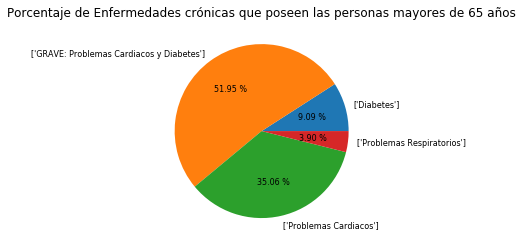

In [56]:
#de los fallecidos, veremos cual es el porcentaje que poseían enfermedades crónicas y cuales eran
dfMayores65Enfermos['enfermedad_cronica'] = dfMayores65Enfermos['enfermedad_cronica'].astype(str)  #Convertimos con este comando la columna "age"
dfMayores65Enfermos.groupby('enfermedad_cronica')['enfermedad_cronica'].count().plot(kind='pie', autopct='%.2f %%', fontsize=8)
plt.ylabel('')
plt.title('Porcentaje de Enfermedades crónicas que poseen las personas mayores de 65 años')

# vemos que gran parte posee problemas cardiacos y diabetes. Haremos otra gráfica con las personas que fallecieron para contrastar o afirmar

In [57]:
#############

# YA TENIENDO ALGUNAS GRÁFICAS DE UN SECTOR SUMAMENTE VULNERABLE, PROCEDEREMOS A HACER UNA COMPARACIÓN CON LAS PERSONAS QUE LAMENTABLEMENTE HAN FALLECIDO. PARA ELLO VAMOS A CREAR UN DATAFRAME NUEVO SOLAMENTE CON LAS PERSONAS QUE EN EL "OUTCOME" APARECEN COMO FALLECIDAS. 

In [58]:
dfFallecidos = dfPrueba.loc[dfPrueba.outcome=='died'] #creamos el dataframe

In [59]:
dfFallecidos.head() #consultamos

,respaldo_edad,Rango,RangoId,sex,date_confirmation,country,city,sintomas,sintomasId,enfermedad_cronica,enfermedad_cronicaId,date_death_or_discharge,outcome
10797,60-69,['66 - 80'],5,male,10.03.2020,United States,Pennington County,[ASINTOMATICO],0,[Otro/noPosee],0,NaN,died
12220,nan,No hay Edad,0,NaN,24.01.2020,China,Suihua City,[ASINTOMATICO],0,[Otro/noPosee],0,23.01.2020,died
13331,39,['26 - 50'],3,male,22.01.2020,China,Hong Kong,[FIEBRE Y TOS],3,[Otro/noPosee],0,NaN,died
14442,44,['26 - 50'],3,male,01.02.2020,Philippines,Manila,[Otro],1,[Otro/noPosee],0,01.02.2020,died
15553,nan,No hay Edad,0,NaN,07.03.2020,United States,King County,[ASINTOMATICO],0,[Otro/noPosee],0,06.03.2020,died


# CON EL DATAFRAME CREADO, HAREMOS LA SIGUIENTE GRÁFICA: 
# CUAL ES EL PORCENTAJE DE ENFERMEDADES CRÓNICAS QUE TENÍAN LAS PERSONAS QUE FALLECIERON

C:\Users\Dell\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 1.0, 'Porcentaje de Enfermedades crónicas que poseían las personas que fallecieron')

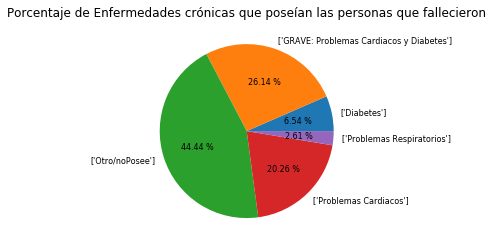

In [60]:
#de los fallecidos, veremos cual es el porcentaje que poseían enfermedades crónicas y cuales eran
dfFallecidos['enfermedad_cronica'] = dfFallecidos['enfermedad_cronica'].astype(str)  #Convertimos con este comando la columna "age"
dfFallecidos.groupby('enfermedad_cronica')['enfermedad_cronica'].count().plot(kind='pie', autopct='%.2f %%', fontsize=8)
plt.ylabel('')
plt.title('Porcentaje de Enfermedades crónicas que poseían las personas que fallecieron')

# VEMOS QUE UN 44% NO POSEÍAN ENFERMEDADES CRÓNICAS , PERO SI COMPARAMOS ESE PORCENTAJE CON LOS DEMÁS, VEMOS QUE SE CUMPLE LO QUE HABÍA MENCIONADO LA OMS, PROBLEMAS CARDIACOS, DIABETES, RESPIRATORIOS, TENIENDO COMO PRINCIPALES ENFERMEDADES, LOS PROBLEMAS CARDIACOS Y DIABETES

In [61]:
#######

# AHORA UNA DE LAS INFORMACIONES MÁS IMPORTANTES A LA HORA DE RECIBIR PACIENTES EN UN HOSPITAL Y QUE SEA MAYOR A 65 AÑOS, ES VER QUÉ TIPO DE SÍNTOMAS PRESENTABAN LOS QUE FALLECIERON.

C:\Users\Dell\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 1.0, 'Cuales fueron los síntomas predominantes en las personas fallecidas')

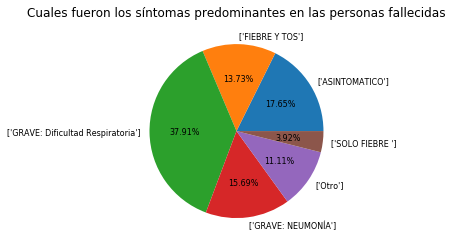

In [62]:
#ahora veremos cuáles eran los síntomas que presentaron las personas que fallecieron
dfFallecidos['sintomas'] = dfFallecidos['sintomas'].astype(str)  #Convertimos con este comando la columna "age"
dfFallecidos.groupby('sintomas')['sintomas'].count().plot(kind='pie', autopct='%.2f%%', fontsize=8,labeldistance=1.1)
plt.ylabel('')
plt.title('Cuales fueron los síntomas predominantes en las personas fallecidas')

# OBSERVAMOS QUE GRAN PARTE DE LOS QUE FALLECIERON, PRESENTARON SÍNTOMAS DE CARÁCTER RESPIRATORIO, CON UN 54,6% SI SUMAMOS NEUMONÍA Y PROBLEMAS RESPIRATORIOS DIVERSOS COMO DIFICULTAD PARA RESPIRAR, ETC.

In [63]:
 #########

# Ahora veremos el rango de edad de personas que han fallecido

C:\Users\Dell\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 1.0, 'Cuál son los rangos de edad predominantes en las personas fallecidas')

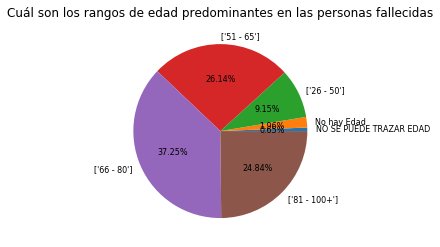

In [64]:
#ahora veremos el rango de edad en personas que fallecieron
dfFallecidos['Rango'] = dfFallecidos['Rango'].astype(str)  #Convertimos con este comando la columna "age"
dfFallecidos.groupby('Rango')['Rango'].count().plot(kind='pie', autopct='%.2f%%', fontsize=8,labeldistance=1.1)
plt.ylabel('')
plt.title('Cuál son los rangos de edad predominantes en las personas fallecidas')

# Como Conclusión de esta segunda entrega es que la edad, síntomas y enfermedades crónicas juegan un rol importante a la hora de determinar si un paciente es prioritario para recibir atención urgente o no. Como vimos, las edades desde los 60 en adelante son de vital importancia por el hecho de ser más vulnerables más aún si poseen ciertas enfermedades y síntomas específicos. Con los gráficos obtenidos, podemos ya tener las variables con las cuales entrenaremos a nuestro modelo de predicción: las etiquetas. En cuanto a la manipulación de la data, aprendimos a cómo manejar dataframes con Pandas, buscar determinados carácteres mediante regex y crear funciones que nos facilitan la búsqueda y limpieza de información con el lenguaje Python 3. De momento conservamos las filas con datos nulos, ya que no son nulos en todas las dimensiones, pueden darnos información importante para representar tendencias en otros aspectos que analizaremos más adelante

# modelo prediccion en base a arbol de decision (etiquetado)

In [65]:
#haremos un modelo predictivo en base a los 3 parametros, la edad, sintomas y enfermedad crónica

In [66]:
dfPrueba['RangoId'] = dfPrueba['RangoId'].astype(int)

In [67]:
dfPrueba['sintomasId'] = dfPrueba['sintomasId'].astype(int)

In [68]:
dfPrueba['enfermedad_cronicaId'] = dfPrueba['enfermedad_cronicaId'].astype(int)

In [69]:
dfPrueba.head()

,respaldo_edad,Rango,RangoId,sex,date_confirmation,country,city,sintomas,sintomasId,enfermedad_cronica,enfermedad_cronicaId,date_death_or_discharge,outcome
0,nan,No hay Edad,0,male,14.02.2020,China,Shek Lei,[ASINTOMATICO],0,[Otro/noPosee],0,NaN,"critical condition, intubated as of 14.02.2020"
1,78,['66 - 80'],5,male,21.02.2020,Italy,Vo Euganeo,[ASINTOMATICO],0,[Otro/noPosee],0,22.02.2020,death
2,61,['51 - 65'],4,female,14.02.2020,Singapore,NaN,[ASINTOMATICO],0,[Otro/noPosee],0,17.02.2020,discharge
3,nan,No hay Edad,0,NaN,26.01.2020,China,Zhengzhou City,[ASINTOMATICO],0,[Otro/noPosee],0,NaN,NaN
4,nan,No hay Edad,0,NaN,14.02.2020,China,Pingxiang City,[ASINTOMATICO],0,[Otro/noPosee],0,NaN,NaN


In [70]:
dfPrueba[(dfPrueba.RangoId == 5)  & (dfPrueba.enfermedad_cronicaId == 6 ) & (dfPrueba.enfermedad_cronicaId == 6) & (dfPrueba.sintomasId == 1)  | (dfPrueba.RangoId==6) & (dfPrueba.enfermedad_cronicaId == 6) & (dfPrueba.sintomasId == 1) ]

,respaldo_edad,Rango,RangoId,sex,date_confirmation,country,city,sintomas,sintomasId,enfermedad_cronica,enfermedad_cronicaId,date_death_or_discharge,outcome
61472,89,['81 - 100+'],6,male,18.01.2020,China,Wuhan City,[Otro],1,[GRAVE: Problemas Cardiacos y Diabetes],6,19.01.2020,died
62804,86,['81 - 100+'],6,male,NaN,China,Wuhan City,[Otro],1,[GRAVE: Problemas Cardiacos y Diabetes],6,21.01.2020,died


# Entrega3
## Integrantes: 
#### Ismael Carroza
#### Alejandro Cornejo
#### Luis Olave 
#### Luis Saavedra 
#### Samuel Santander

## Preparación de la data en cuanto a la defición de etiquetas según gravedad de los parámetros establecidos en la entrega 2

In [71]:
#nuevos datos

In [72]:
dft1 = dfPrueba   # Nuevo dataframe para poder hacer las consultas para rellenar las etiquetas

In [73]:
dft1.head()

,respaldo_edad,Rango,RangoId,sex,date_confirmation,country,city,sintomas,sintomasId,enfermedad_cronica,enfermedad_cronicaId,date_death_or_discharge,outcome
0,nan,No hay Edad,0,male,14.02.2020,China,Shek Lei,[ASINTOMATICO],0,[Otro/noPosee],0,NaN,"critical condition, intubated as of 14.02.2020"
1,78,['66 - 80'],5,male,21.02.2020,Italy,Vo Euganeo,[ASINTOMATICO],0,[Otro/noPosee],0,22.02.2020,death
2,61,['51 - 65'],4,female,14.02.2020,Singapore,NaN,[ASINTOMATICO],0,[Otro/noPosee],0,17.02.2020,discharge
3,nan,No hay Edad,0,NaN,26.01.2020,China,Zhengzhou City,[ASINTOMATICO],0,[Otro/noPosee],0,NaN,NaN
4,nan,No hay Edad,0,NaN,14.02.2020,China,Pingxiang City,[ASINTOMATICO],0,[Otro/noPosee],0,NaN,NaN


In [74]:
dft1 = dft1.drop(columns=['respaldo_edad','Rango', 'sex','date_confirmation','country','city','sintomas','enfermedad_cronica','date_death_or_discharge','outcome'])

In [75]:
dft1.head()

,RangoId,sintomasId,enfermedad_cronicaId
0,0,0,0
1,5,0,0
2,4,0,0
3,0,0,0
4,0,0,0


In [76]:
dft1['target'] = 0

In [77]:
dft1.head()

,RangoId,sintomasId,enfermedad_cronicaId,target
0,0,0,0,0
1,5,0,0,0
2,4,0,0,0
3,0,0,0,0
4,0,0,0,0


In [78]:
dft1['enfermedad_cronicaId'] = dft1['enfermedad_cronicaId'].astype(int)

In [79]:
dfetiqueta0 = dft1.loc[((dft1.RangoId == 6) | (dft1.RangoId == 5)) & (dft1.enfermedad_cronicaId == 6) & ((dft1.sintomasId==5) | (dft1.sintomasId==4) )  ]

In [80]:
dfetiqueta0["target"] = 0

C:\Users\Dell\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [81]:
dfetiqueta0

,RangoId,sintomasId,enfermedad_cronicaId,target
107336,6,4,6,0
107359,6,4,6,0
107366,5,5,6,0
107425,5,4,6,0
107467,5,4,6,0
107559,6,5,6,0
107566,5,5,6,0
107622,5,5,6,0
107634,5,4,6,0
107636,5,5,6,0


In [82]:
#etiqueta 1 personas que posean un rango de edad entre 5, 6, pero que no posean enfermedades crónicas graves (diabetes, hipertension junto con diabetes), pero que tengan sintomas relacionados a la respiracion

In [83]:
 dfetiqueta1 = dft1.loc[((dft1.RangoId == 6) | (dft1.RangoId == 5)) & ((dft1.enfermedad_cronicaId !=6) & (dft1.enfermedad_cronicaId!=5)) & ((dft1.sintomasId==5) | (dft1.sintomasId==4) ) ]

In [84]:
dfetiqueta1["target"] = 1 

C:\Users\Dell\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [85]:
dfetiqueta1

,RangoId,sintomasId,enfermedad_cronicaId,target
1573,5,5,0,1
2791,5,5,0,1
3499,6,4,0,1
3504,5,4,0,1
11111,6,4,0,1
11711,5,5,0,1
12469,5,4,0,1
12485,5,4,0,1
12561,5,5,0,1
17027,5,4,0,1


In [86]:
#etiqueta 2 Gente Joven que posea enfermedades crónicas y sintomas de respiracion

In [87]:
dfetiqueta2 = dft1.loc[((dft1.RangoId == 3 ) | (dft1.RangoId == 4) |(dft1.RangoId == 2)) & ((dft1.enfermedad_cronicaId == 6) | (dft1.enfermedad_cronicaId == 5)) & ((dft1.sintomasId !=0))]

In [88]:
dfetiqueta2['target'] = 2

C:\Users\Dell\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [89]:
dfetiqueta2

,RangoId,sintomasId,enfermedad_cronicaId,target
7534,4,3,5,2
8889,4,1,6,2
57012,4,3,5,2
61361,3,3,5,2
104085,4,3,5,2
107332,4,4,6,2
107333,4,4,5,2
107390,4,4,6,2
107465,4,4,5,2
107548,3,4,5,2


In [90]:
dft1 = dft1.drop(columns=['target'])

In [91]:
dft1.head()

,RangoId,sintomasId,enfermedad_cronicaId
0,0,0,0
1,5,0,0
2,4,0,0
3,0,0,0
4,0,0,0


In [92]:
#etiqueta 3

In [93]:
dfetiqueta3 = dft1.loc[((dft1.RangoId == 2)) & ((dft1.enfermedad_cronicaId !=6) & (dft1.enfermedad_cronicaId !=5)) & ((dft1.sintomasId !=5) & (dft1.sintomasId !=4) & (dft1.sintomasId!=3)  )]

In [94]:
dfetiqueta3['target'] = 3

C:\Users\Dell\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [95]:
dfetiqueta3.tail(786)

,RangoId,sintomasId,enfermedad_cronicaId,target
1134135,2,0,0,3
1134146,2,0,0,3
1134157,2,0,0,3
1134168,2,0,0,3
1134179,2,0,0,3
...,...,...,...,...
1195281,2,0,0,3
1195282,2,0,0,3
1195283,2,0,0,3
1195285,2,0,0,3


In [96]:
dfTrain = dfetiqueta0

In [97]:
dfTrain.head()

,RangoId,sintomasId,enfermedad_cronicaId,target
107336,6,4,6,0
107359,6,4,6,0
107366,5,5,6,0
107425,5,4,6,0
107467,5,4,6,0


In [98]:
dfTrain = dfTrain.append(dfetiqueta1)

In [99]:
dfTrain

,RangoId,sintomasId,enfermedad_cronicaId,target
107336,6,4,6,0
107359,6,4,6,0
107366,5,5,6,0
107425,5,4,6,0
107467,5,4,6,0
...,...,...,...,...
261605,6,4,0,1
261614,5,4,0,1
261896,5,4,0,1
262086,5,4,0,1


In [100]:
dfTrain = dfTrain.append(dfetiqueta2)

In [101]:
dfTrain.loc[dfTrain.target==1]

,RangoId,sintomasId,enfermedad_cronicaId,target
1573,5,5,0,1
2791,5,5,0,1
3499,6,4,0,1
3504,5,4,0,1
11111,6,4,0,1
11711,5,5,0,1
12469,5,4,0,1
12485,5,4,0,1
12561,5,5,0,1
17027,5,4,0,1


In [102]:
dfTrain = dfTrain.append(dfetiqueta2)

In [103]:
dfTrain.loc[(dfTrain.target==2)]

,RangoId,sintomasId,enfermedad_cronicaId,target
7534,4,3,5,2
8889,4,1,6,2
57012,4,3,5,2
61361,3,3,5,2
104085,4,3,5,2
107332,4,4,6,2
107333,4,4,5,2
107390,4,4,6,2
107465,4,4,5,2
107548,3,4,5,2


In [104]:
dfTrain = dfTrain.append(dfetiqueta3)

In [105]:
dfTrain.loc[(dfTrain.target==3)]

,RangoId,sintomasId,enfermedad_cronicaId,target
29,2,0,0,3
56,2,0,0,3
60,2,0,0,3
557,2,0,0,3
774,2,0,0,3
...,...,...,...,...
1195281,2,0,0,3
1195282,2,0,0,3
1195283,2,0,0,3
1195285,2,0,0,3


In [106]:
len(dfTrain)

6591

In [107]:
target = dfTrain

In [108]:
target.head(123)

,RangoId,sintomasId,enfermedad_cronicaId,target
107336,6,4,6,0
107359,6,4,6,0
107366,5,5,6,0
107425,5,4,6,0
107467,5,4,6,0
...,...,...,...,...
108086,4,5,6,2
108107,4,4,6,2
108263,3,4,5,2
108334,4,4,6,2


In [109]:
len(target)

6591

In [110]:
target = target.drop(columns=['RangoId', 'sintomasId','enfermedad_cronicaId'])

In [111]:
dfTrain = dfTrain.drop(columns=['target'])

In [112]:
target

,target
107336,0
107359,0
107366,0
107425,0
107467,0
...,...
1195281,3
1195282,3
1195283,3
1195285,3


In [113]:
dfTrain

,RangoId,sintomasId,enfermedad_cronicaId
107336,6,4,6
107359,6,4,6
107366,5,5,6
107425,5,4,6
107467,5,4,6
...,...,...,...
1195281,2,0,0
1195282,2,0,0
1195283,2,0,0
1195285,2,0,0


# ENTRENAMIENTO

## Vecinos Cercanos de Sklearn

In [114]:
from sklearn.neighbors import KNeighborsClassifier #despues de que se entrene, verá el nuevo valor según las clasificaciones vecinas
from sklearn.model_selection import train_test_split

In [115]:
X_train, X_test, y_train, y_test = train_test_split(dfTrain, target['target'], test_size = 0.3, train_size=0.7)

In [116]:
X_train.shape

(4613, 3)

In [117]:
y_train.shape

(4613,)

In [118]:
knn = KNeighborsClassifier(n_neighbors = 3500)

In [119]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3500, p=2,
                     weights='uniform')

In [120]:
knn.score(X_train, y_train)

0.9820073704747453

In [121]:
knn.predict([[6, 5, 6]])     

array([3], dtype=int64)

In [177]:
#rangos(0-6), sintomas(0-5), enfermedad(0-6).. de menos a más, mucho más crítico
r = knn.predict([[6, 6, 6]])  
if r == 0:
    print("PACIENTE PRIORITARIO!!. REQUIERE HOSPITALIZACIÓN Y EXÁMENES URGENTE!")
else:
    if r == 1:
        print("Requiere atención urgente, realizar examenes y observación para posible hospitalización")
    else:
        if r == 2:
            print("Requiere Atención Urgente, realizar examenes")
        else:
            if r == 3:
                print("No requiere hospitalización")

No requiere hospitalización


In [123]:
#valores de la prediccion
#0 = Requiere atención urgente, hospitalizar
#1 = Requiere atencion urgente, no es necesario hospitalizar
#2 = Requiere atención semi-urgente, no es necesario hospitalizar
#3 = 

## Arbol de decisiones

In [124]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score

In [125]:
X_train, X_test, y_train, y_test = train_test_split(dfTrain, target['target'])

In [126]:
arbol = DecisionTreeClassifier(max_depth = 2)

In [127]:
arbol.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [128]:
arbol.score(X_test, y_test)

0.9951456310679612

In [129]:
arbol.predict([[6, 6, 6]])

array([2], dtype=int64)

In [130]:
arbol.predict_proba([[6, 6, 6]])

array([[0.28888889, 0.        , 0.71111111, 0.        ]])

In [131]:
target

,target
107336,0
107359,0
107366,0
107425,0
107467,0
...,...
1195281,3
1195282,3
1195283,3
1195285,3


## Red Neuronal La que mejor se adapta

In [132]:
from sklearn.neural_network import MLPClassifier

In [133]:
caracteristicas = dfTrain

In [134]:
etiquetas = target

In [135]:
Xent, Xtest, yent, ytest = train_test_split(caracteristicas, etiquetas)

In [157]:
red = MLPClassifier(max_iter=6000, hidden_layer_sizes=(9, 9))     

In [158]:
red.fit(Xent, yent)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(9, 9), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=6000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [159]:
red.score(Xent, yent)

0.998179243374469

In [160]:
red.predict([[6, 5, 6]])

array([0], dtype=int64)

In [140]:
red.predict([[3, 0, 0]])

array([3], dtype=int64)

In [181]:
#rangos(0-6), sintomas(0-5), enfermedad(0-6).. de menos a más, mucho más crítico
r = red.predict([[3, 0, 0]])  
if r == 0:
    print("PACIENTE PRIORITARIO!!. REQUIERE HOSPITALIZACIÓN URGENTE!")
else:
    if r == 1:
        print("PACIENTE PRIORITARIO!. REQUIERE REALIZACIÓN DE EXAMENES URGENTE")
    else:
        if r == 2:
            print("POSIBLE AGRAVAMIENTO, REALIZAR EXÁMENES")
        else:
            if r == 3:
                print("No requiere hospitalización, observación")

No requiere hospitalización, observación


## No supervisado Kmeans

In [142]:
from sklearn.cluster import KMeans
from sklearn import metrics

In [143]:
X = dfTrain
y = target

In [144]:
y

,target
107336,0
107359,0
107366,0
107425,0
107467,0
...,...
1195281,3
1195282,3
1195283,3
1195285,3


In [145]:
arraytarget = []

for row in target['target']:
    arraytarget.append(row)

arraytarget

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,


In [146]:
len(arraytarget)


6591

In [147]:
len(dfTrain)

6591

In [148]:
km = KMeans(n_clusters = 4, max_iter = 4000)

In [149]:
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=4000,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [150]:
predicciones = km.predict(X)

In [151]:
predicciones

array([3, 3, 3, ..., 0, 0, 0])

In [152]:
score = metrics.adjusted_rand_score(arraytarget, predicciones) #hacemos entonces la comparativa para ver qué tanto aprendió el algoritmo

In [153]:
print(score)

0.9988814303192973
